In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

In [4]:
# Helper function to display images
def display_image(img, title="Image", cmap=None):
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('on')
    plt.show()

import os
print(os.getcwd())

/Users/frankcholula/Workspace/school/EEE3032_CVPR/cvprlab


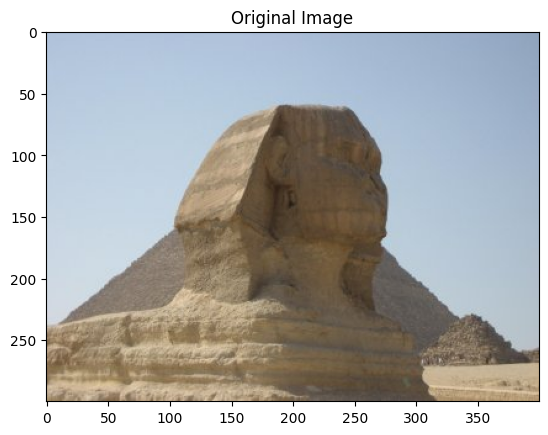

In [5]:
# Ex1: Loading an image
img = cv2.imread('cvprlab_python/testimages/sphinx.jpg')  # Make sure to use your actual image path
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV default) to RGB
display_image(img, "Original Image")

In [7]:
# Ex2: Colour image representation
print(f"Image size: {img.shape}")  # Shows (height, width, channels)

Image size: (300, 400, 3)


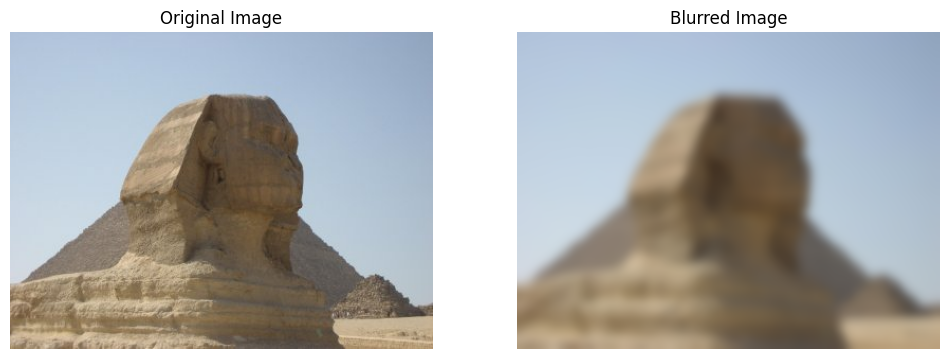

In [24]:
img = cv2.imread('cvprlab_python/testimages/sphinx.jpg')  # Make sure to use your actual image path
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV default) to RGB

def display_images_side_by_side(image1, title1, image2, title2):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(image1)
    axes[0].set_title(title1)
    axes[0].axis('off')
    
    axes[1].imshow(image2)
    axes[1].set_title(title2)
    axes[1].axis('off')
    
    plt.show()
# Apply Gaussian Blur
blurred_img = cv2.GaussianBlur(img, (31, 31), 0)  # (15, 15) is the kernel size, 0 is the standard deviation
display_images_side_by_side(img, "Original Image", blurred_img, "Blurred Image")

(31, 31)


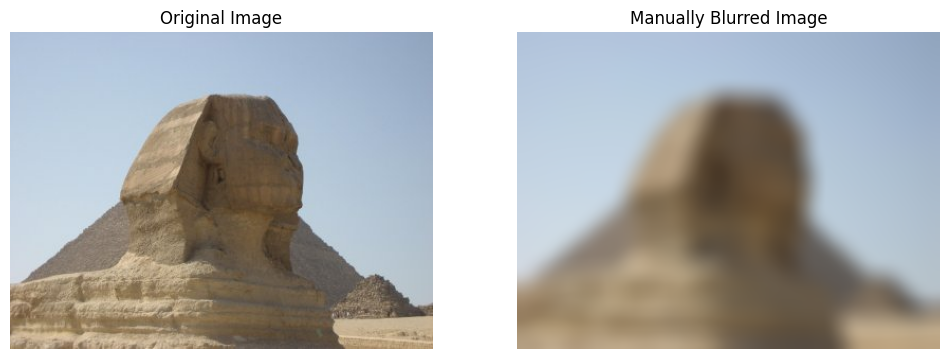

In [29]:
def create_gaussian_kernel(size, sigma):
    """Create a Gaussian kernel."""
    k = cv2.getGaussianKernel(size, sigma)
    gaussian_kernel = k @ k.T
    print(gaussian_kernel.shape)
    return gaussian_kernel

def apply_convolution(image, kernel):
    """Apply convolution between an image and a kernel."""
    return cv2.filter2D(image, -1, kernel)

# Ex1: Loading an image
img = cv2.imread('cvprlab_python/testimages/sphinx.jpg')  # Make sure to use your actual image path
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV default) to RGB

# Create Gaussian Kernel
kernel_size = 31
sigma = 10
gaussian_kernel = create_gaussian_kernel(kernel_size, sigma)

# Apply Gaussian Blur manually
blurred_img_manual = apply_convolution(img, gaussian_kernel)

# Display images side by side
display_images_side_by_side(img, "Original Image", blurred_img_manual, "Manually Blurred Image")

In [6]:
p = img[2, 3]  # OpenCV uses (y,x) format
print(f"RGB value at (2,3): {p}")

RGB value at (2,3): [176 194 218]


In [9]:
p = img[2,1,1]
print(f"Getting the red pixel value at (1,2): {p}")

Getting the red pixel value at (1,2): 193


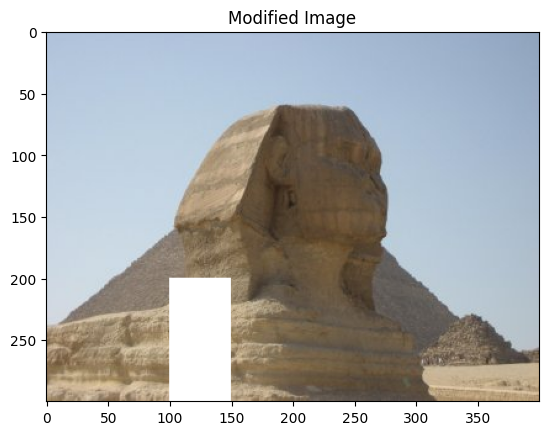

In [10]:
img_copy = img.copy()  # Create a copy of the image
img_copy[200:300, 100:150] = [255, 255, 255]  # Set to white
display_image(img_copy, "Modified Image")

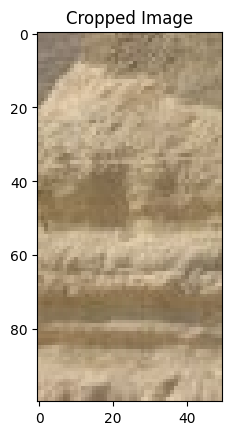

In [11]:
# Crop part of the image
subimg = img[200:300, 100:150]
display_image(subimg, "Cropped Image")

In [12]:
# Ex4: Saving an image
cv2.imwrite('out.jpg', cv2.cvtColor(subimg, cv2.COLOR_RGB2BGR))  # Save as JPEG
print("Cropped image saved as 'out.jpg'")
# better to use lossless compression like TIFF or PNG

Cropped image saved as 'out.jpg'


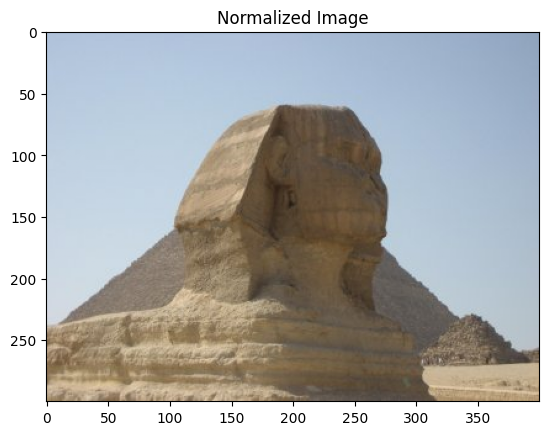

In [14]:
# Ex5: Normalized images
norm_img = img / 255.0  # Normalize the pixel values to the range 0-1
display_image(norm_img, "Normalized Image")

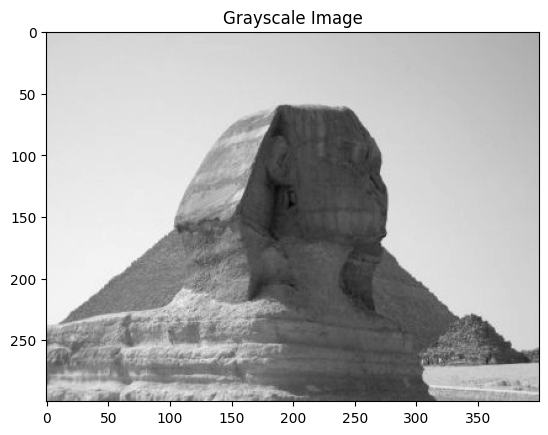

(300, 400)

In [19]:
# Ex6: Grayscale conversion
grey_img = 0.30 * norm_img[:, :, 0] + 0.59 * norm_img[:, :, 1] + 0.11 * norm_img[:, :, 2]  # Convert to grayscale
display_image(grey_img, "Grayscale Image", cmap='gray')
grey_img.shape

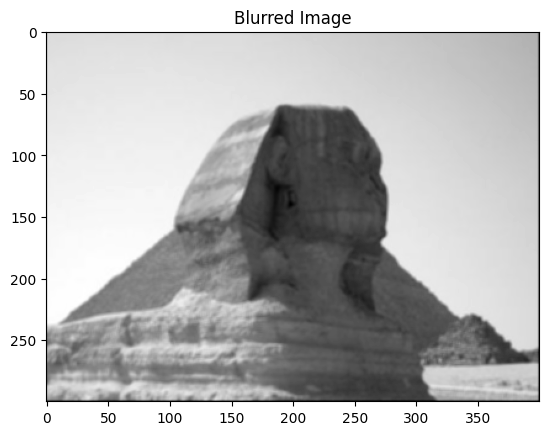

In [20]:
# Ex7: Filter for blur (low-pass filter)
# Create a 3x3 mean filter
K = np.ones((3, 3)) / 9
blurred_img = convolve2d(grey_img, K, mode='same')  # Apply the filter using convolution
display_image(blurred_img, "Blurred Image", cmap='gray')

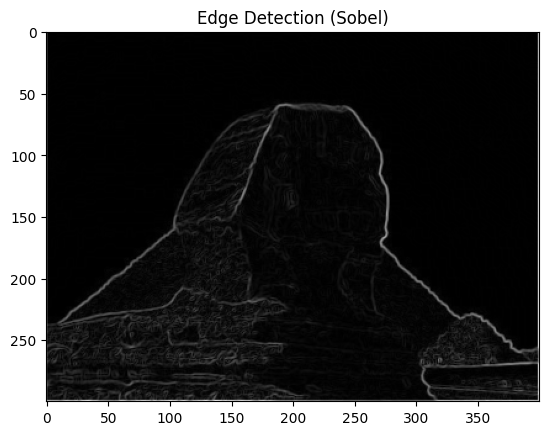

In [23]:
# Sobel filter kernels
Kx = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]) / 4
Ky = np.transpose(Kx)

# Convolve to get derivatives
dx = convolve2d(grey_img, Kx, mode='same')
dy = convolve2d(grey_img, Ky, mode='same')

# Compute the magnitude of the gradient
mag = np.sqrt(dx**2 + dy**2)

# Display the edge-detected image
display_image(mag, "Edge Detection (Sobel)", cmap='gray')

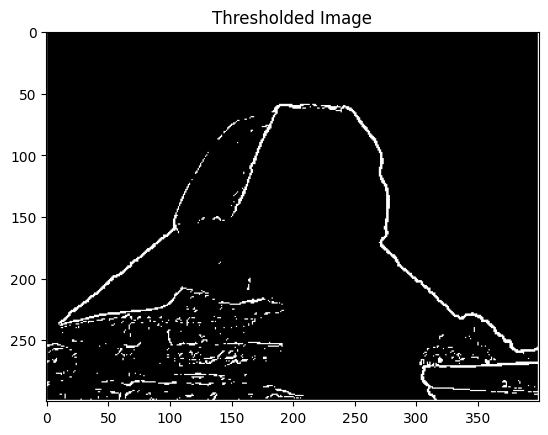

In [34]:
# Ex9: Thresholding an image
threshold = 0.15
thresholded_img = (mag > threshold).astype(np.uint8)

# Display the thresho lded image (binary mask)
display_image(thresholded_img, "Thresholded Image", cmap='gray')